In [247]:
Conducting analysis on OECD statistics database about 'share of employed who are managers, by gender'
from IPython.display import display


In [248]:
import pandas as pd
from pandas import Series,DataFrame

In [249]:
import numpy as np

In [250]:
import matplotlib.pyplot as plt
import seaborn as sns

In [251]:
raw_csv=pd.read_csv("c:\python\gendergap.csv",sep=",",index_col=False)
#opening the OECD statistics file - "share of employed who are managers, by sex (in precentage)""
raw_csv

,Country,Sex,Time,Value
0,Austria,Men,2011,6.8
1,Austria,Women,2011,3.0
2,Belgium,Men,2011,9.2
3,Belgium,Women,2011,4.7
4,Denmark,Men,2011,3.7
...,...,...,...,...
513,Slovenia,Women,2017,6.8
514,South Africa,Men,2017,10.9
515,South Africa,Women,2017,6.5
516,OECD - Average,Men,2017,7.8


In [252]:
raw_csv=raw_csv.rename({'Sex': 'Gender', 'Time': 'Year'}, axis=1)  
#Changing columns' names.

In [253]:
raw_csv.columns 

Index(['Country', 'Gender', 'Year', 'Value'], dtype='object')

In [254]:
group1 = raw_csv.groupby(["Gender","Year"])[["Value"]].mean().head(20)
#group the data by year & gender columns

group1

Value
Gender Year          
Men    2011  8.008571
       2012  7.597368
       2013  7.807692
       2014  7.955263
       2015  7.715789
       2016  7.916667
       2017  7.640000
Women  2011  4.662857
       2012  4.465789
       2013  4.605128
       2014  4.694737
       2015  4.592105
       2016  4.919444
       2017  4.691429

In [255]:
# -- conclusion 1: 
# avg. % of Men employed as managers is higher than women consistanly throughout the years among OECD countries 

Text(0.5, 1, 'Conclusion nu.1 - Data Visualization 1')

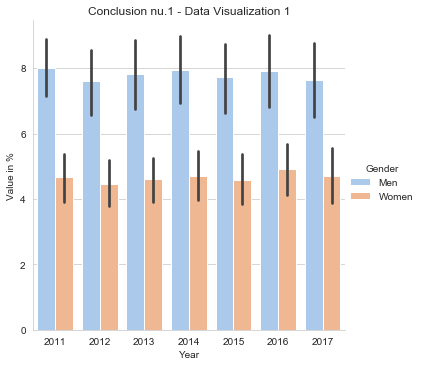

In [256]:
#Let's visualize conclusion nu.1 
%matplotlib inline
sns.catplot(x="Year",y="Value",hue="Gender",palette="pastel",kind="bar",
           data=raw_csv).set_axis_labels("Year","Value in %")
plt.title("Conclusion nu.1 - Data Visualization 1")

Text(0.5, 1.0, 'Conclusion nu.1 - Data Visualization 2')

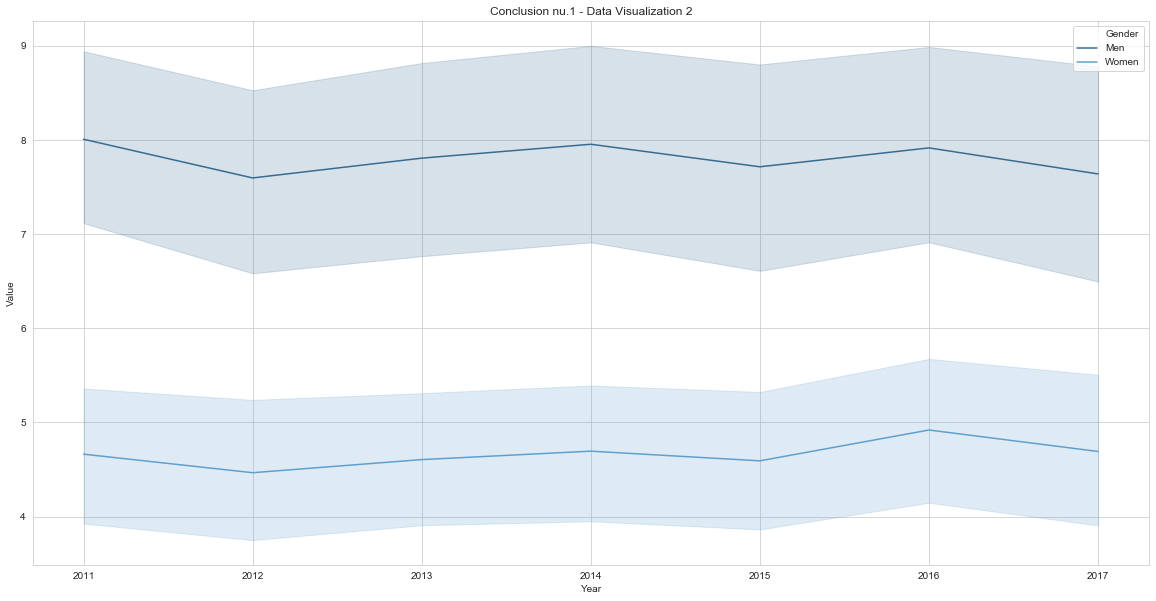

In [274]:
sns.set_style('whitegrid')
sns.lineplot(x="Year", y="Value",
                  hue="Gender",palette=("Blues_d"), data=raw_csv)
plt.title("Conclusion nu.1 - Data Visualization 2")

In [258]:
#next--> Let's create a new column "Gender gap" to see in which country the gender gap is the most significant

group2 = raw_csv.groupby(["Country","Gender"]).sum()

gap = []
for i in range(0,len(group2["Value"])):
    if i % 2 == 0:
        x = group2['Value'].iloc[i]-group2['Value'].iloc[i+1]
        gap.append(float("{0:.2f}".format(x)))
    else:
        gap.append(float(0))

group2["Gender gap %"]= gap


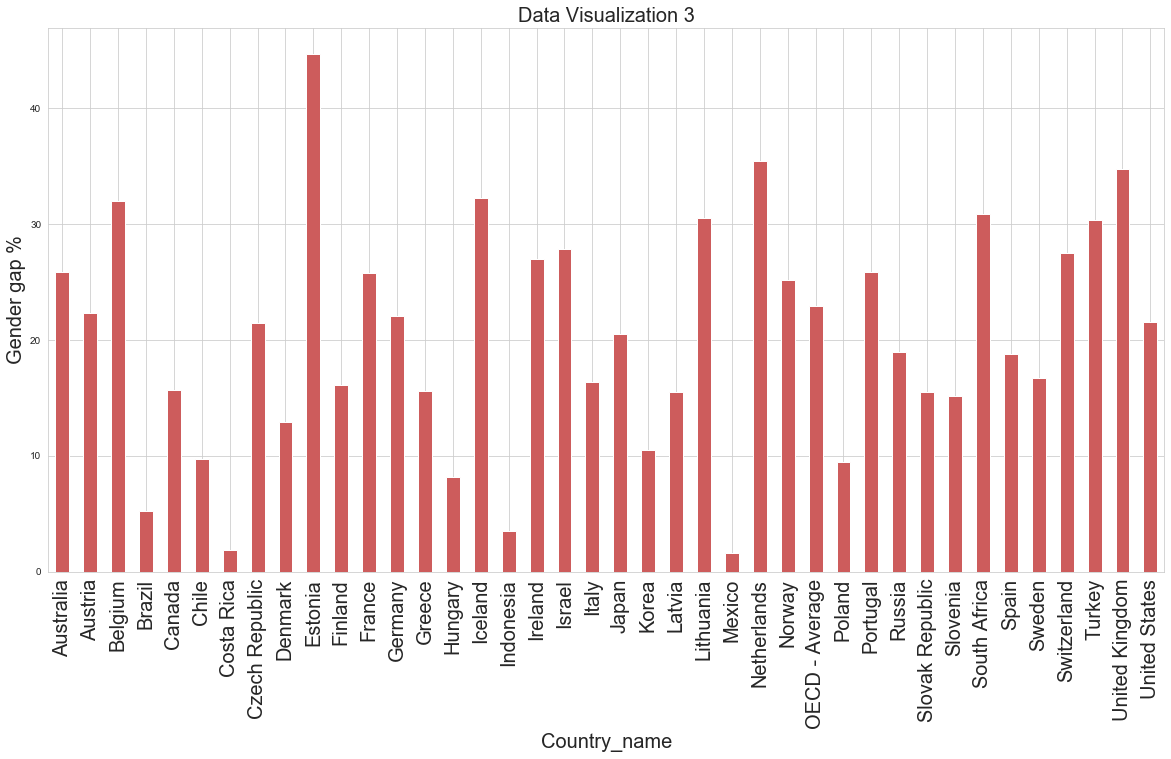

In [275]:
plt.rcParams["figure.figsize"] = (20,10)
group3 = group2.groupby("Country")["Gender gap %"].sum().plot(kind="bar",color="indianred")
plt.xlabel("Country_name", fontsize=20)
plt.ylabel("Gender gap %", fontsize=20)
plt.tick_params(axis="x", labelsize=20)
plt.title("Data Visualization 3",size=20)
group3 

#Conclusion 2: Denmark is the leading OECD country when it comes to gender gap in employees who are managers

In [279]:
#Let's merge another dataset to our current one

In [280]:
raw_xlsfile = pd.read_excel('c:\python\Country_data.xlsx')

In [281]:
raw_xlsfile.head(10)

,Country,population,personal_income_tax,interest_rate,life_expectancy,years_of_schooling,internet_penetration,credit_card_ownership,GDP_percpita,GINI,account_ownership,unemployment,internet_users,debit_card
0,China,1393.8,0.450,0.0435,76.0,13.5,0.52,0.21,5000,42.2,0.802291,0.04714,720.000000,0.67
1,Botswana,2.2,0.250,0.0500,64.5,12.6,0.21,0.10,2200,60.5,0.448283,0.17618,0.492787,0.27
2,Singapore,5.8,0.220,0.0197,83.2,15.4,0.83,0.49,23700,46.4,0.978123,0.01836,4.700000,0.92
3,Brazil,209.4,0.275,0.0650,74.7,15.2,0.66,0.32,7600,51.3,0.700439,0.12041,140.000000,0.59
4,Australia,24.1,0.450,0.0150,82.5,20.4,0.85,0.60,29000,34.7,0.995194,0.05474,21.000000,0.90
5,United States,328.0,0.370,0.0250,79.2,16.5,0.89,0.66,37800,41.0,0.931222,0.04036,290.000000,0.80
6,Cyprus,1.2,0.350,0.0000,80.3,14.3,0.72,0.26,18000,35.6,0.887158,0.10359,0.844680,0.58
7,Denmark,5.8,0.558,-0.0065,80.4,19.2,0.96,0.36,31100,28.5,0.999174,0.05360,5.500000,0.97
8,New Zealand,4.9,0.330,0.0175,82.0,19.2,0.89,0.61,21600,36.2,0.991784,0.05039,4.100000,0.96
9,Hungary,9.8,0.150,0.0090,75.3,15.6,0.80,0.12,29100,30.9,0.749450,0.03649,7.900000,0.69


In [282]:
merge = pd.merge(group2,raw_xlsfile,on='Country')
#Let's focus on population feature

group3= merge.groupby(["Country"])["population","Gender gap %"].sum()
group3.sort_values(by=["Gender gap %"],ascending=False)

,population,Gender gap %
Country,,
Estonia,2.6,44.7
Netherlands,34.4,35.5
United Kingdom,132.8,34.8
Belgium,22.8,32.0
South Africa,115.4,30.9
Lithuania,5.6,30.5
Turkey,162.6,30.4
Israel,17.0,27.9
Switzerland,17.0,27.5


Text(0.5, 1.0, 'Conclusion nu.2 - Data Visualization 4')

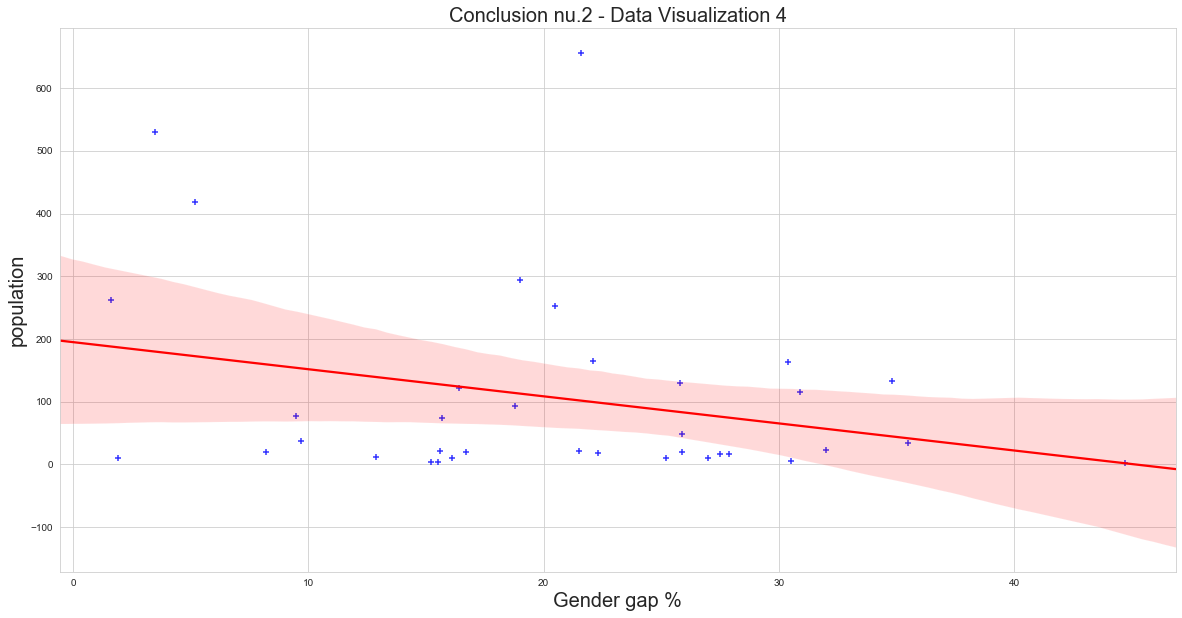

In [283]:
sns.regplot(x="Gender gap %", y="population", data=group3,marker="+", 
            scatter_kws={"color": "blue"}, line_kws={"color": "red"})

plt.xlabel("Gender gap %", fontsize=20)
plt.ylabel("population", fontsize=20)
plt.title("Conclusion nu.2 - Data Visualization 4",size=20)

#--> conclusion nu.2:
#According to the regression line there is a negative correlation between the 2 variables